In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn import preprocessing
%matplotlib inline

In [2]:
train_org = pd.read_csv('Loan_PredTrain.csv')

In [3]:
train_org.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [4]:
test_org = pd.read_csv('Loan_PredTest.csv')

In [5]:
test_org.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [6]:
train = train_org.copy()

In [7]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [8]:
train_org.shape

(614, 13)

In [9]:
train.shape

(614, 13)

In [10]:
test = test_org.copy()

In [11]:
test_org.shape

(367, 12)

In [12]:
test.shape

(367, 12)

In [13]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [15]:
#Exploring Train Data

In [16]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [18]:
((train.isnull().sum())/(train.isnull().count())*100)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [19]:
train.Loan_Status.value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

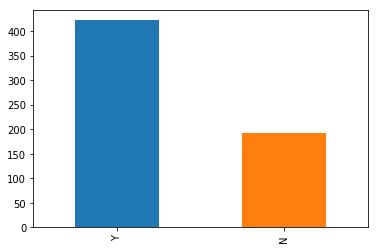

In [20]:
train.Loan_Status.value_counts().plot.bar()

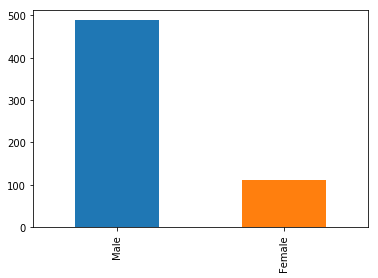

In [21]:
train['Gender'].value_counts().plot.bar()

In [22]:
train.Gender.value_counts(normalize = True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

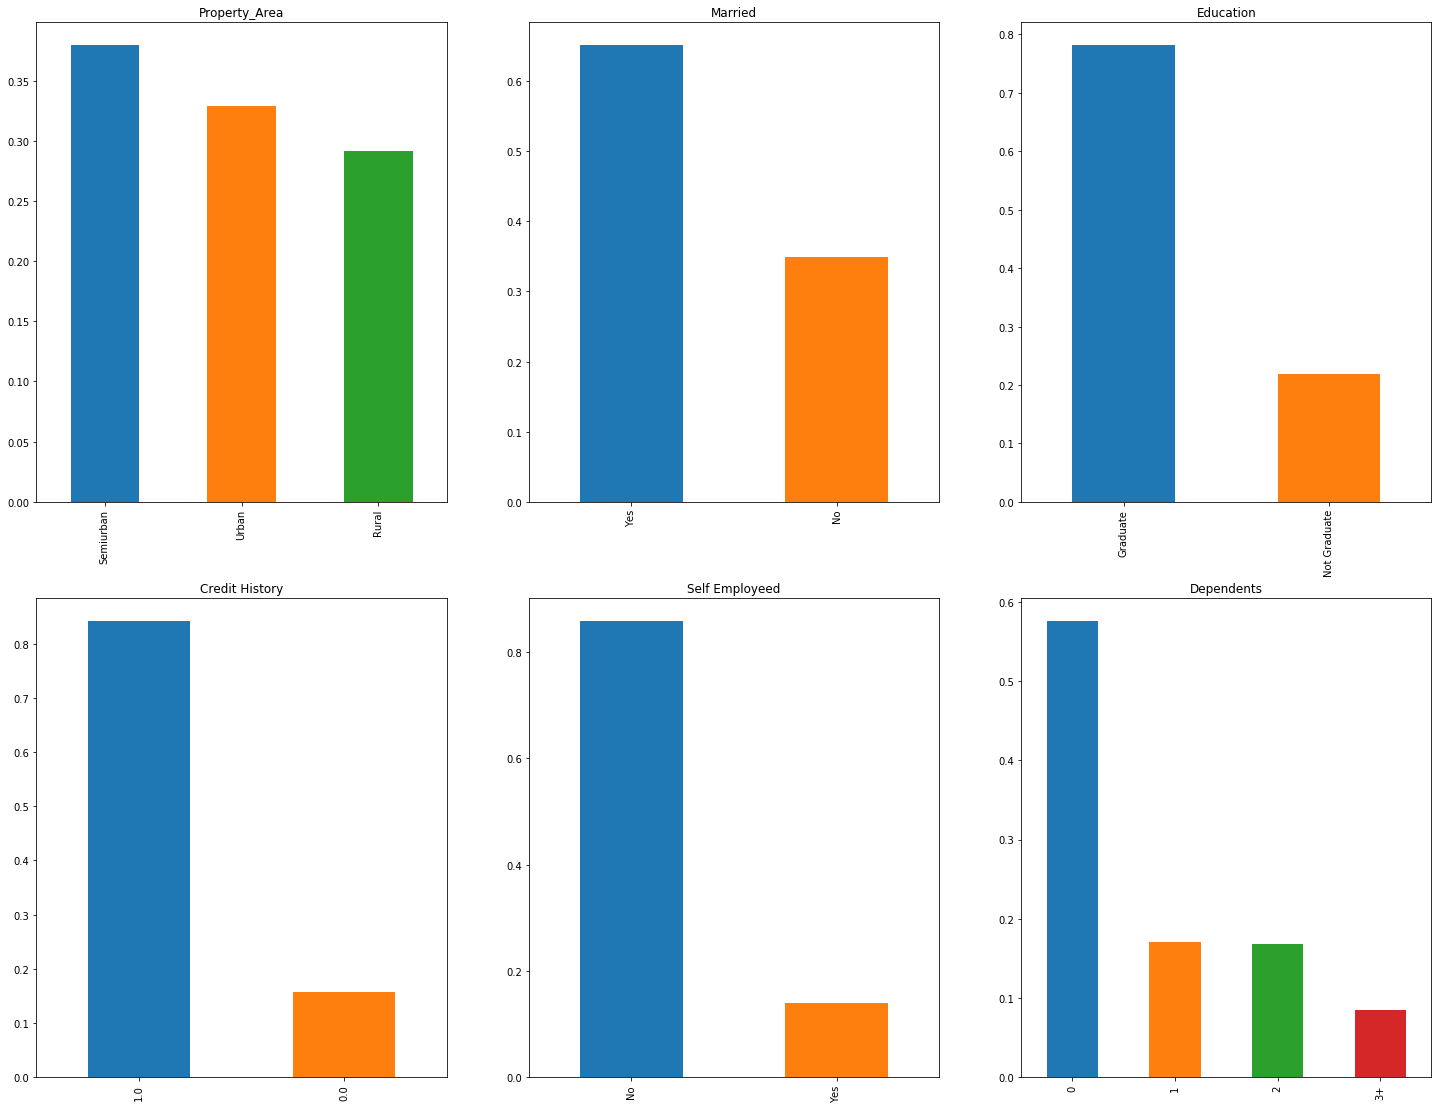

In [23]:
plt.figure(1)
plt.subplot(331)
train['Property_Area'].value_counts(normalize = True).plot.bar(figsize = (25,15), title= 'Property_Area')

plt.subplot(332)
train['Married'].value_counts(normalize = True).plot.bar(figsize = (25,30), title= 'Married')


plt.subplot(333)
train['Education'].value_counts(normalize = True).plot.bar(title = 'Education',)

plt.subplot(334)
train['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit History')

plt.subplot(335)
train['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self Employeed')

plt.subplot(336)
train['Dependents'].value_counts(normalize = True).plot.bar(title = 'Dependents')
plt.show()

In [24]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

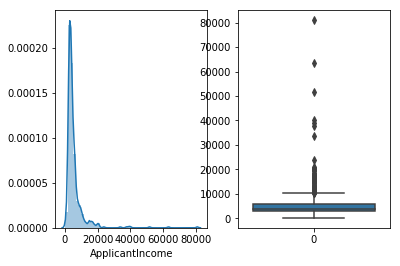

In [26]:
plt.figure(100)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
sns.boxplot(data =train['ApplicantIncome'])

plt.show()

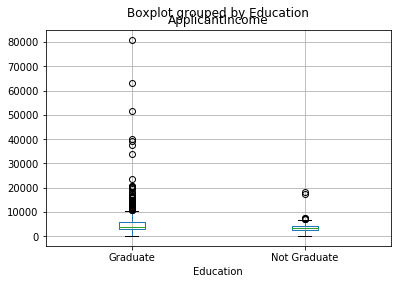

In [27]:
train.boxplot(column = 'ApplicantIncome', by = 'Education')

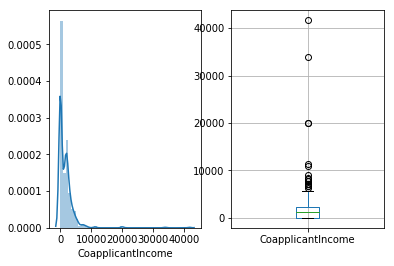

In [28]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train.boxplot(column = 'CoapplicantIncome', figsize = (20,40))

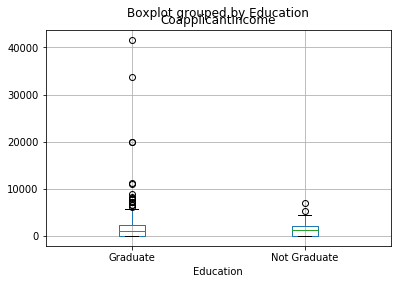

In [29]:
train.boxplot(column = 'CoapplicantIncome', by = 'Education')

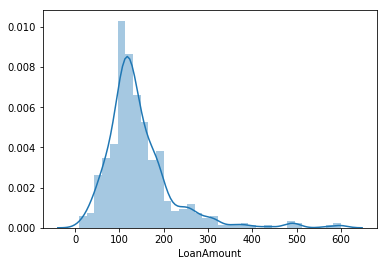

In [30]:
df = train.dropna()
sns.distplot(df['LoanAmount'])

In [31]:
married=pd.crosstab(train['Married'],train['Loan_Status'])
gender = pd.crosstab(train['Gender'],train['Loan_Status'])
gependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
education = pd.crosstab(train['Education'],train['Loan_Status'])
selfemployeed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
credithistory = pd.crosstab(train['Credit_History'],train['Loan_Status'])
proparea = pd.crosstab(train['Property_Area'],train['Loan_Status'])  

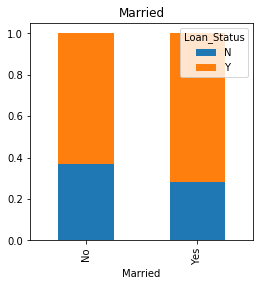

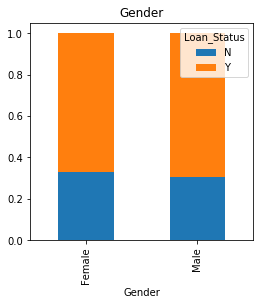

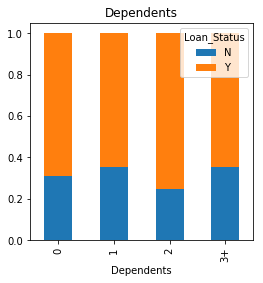

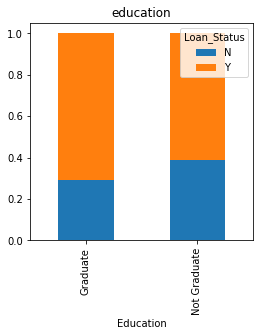

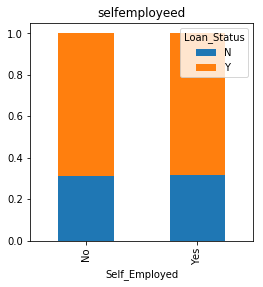

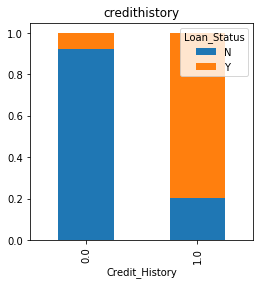

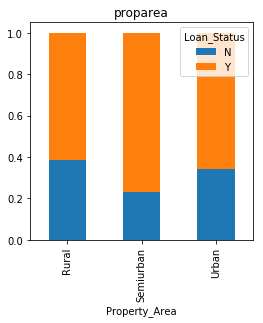

In [32]:
married.div(married.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4), title = "Married")
gender.div(gender.sum(1).astype(float),axis =0).plot(kind = "bar", stacked = True, figsize = (4,4), title = "Gender")
gependents.div(gependents.sum(1).astype(float),axis =0).plot(kind = "bar", stacked = True, figsize = (4,4), title = "Dependents")
education.div(education.sum(1).astype(float),axis =0).plot(kind = "bar", stacked = True, figsize = (4,4), title = "education")
selfemployeed.div(selfemployeed.sum(1).astype(float),axis =0).plot(kind = "bar", stacked = True, figsize = (4,4), title = "selfemployeed")
credithistory.div(credithistory.sum(1).astype(float),axis =0).plot(kind = "bar", stacked = True, figsize = (4,4), title = "credithistory")
proparea.div(proparea.sum(1).astype(float),axis =0).plot(kind = "bar", stacked = True, figsize = (4,4), title = "proparea")


In [33]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [34]:
train['ApplicantIncome'].mean()

5403.459283387622

In [35]:
bins=[0,2500,6000,12000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

In [36]:
income_bins = pd.crosstab(train['Income_bin'], train['Loan_Status'])

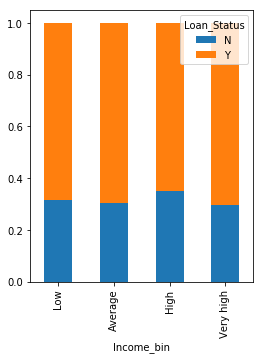

In [37]:
income_bins.div(income_bins.sum(1).astype(float), axis = 0).plot(kind ='bar', stacked = True, figsize = (4,5))

In [38]:
train.LoanAmount.max()

700.0

In [39]:
binsL = [train.LoanAmount.min(),train.LoanAmount.mean(),300, 900 ]
groupL = ['Low','Average', 'High']

In [40]:
train['LoanAmount_Bins'] = pd.cut(train['LoanAmount'], binsL, labels = groupL)

In [41]:
loanamount_bins = pd.crosstab(train['LoanAmount_Bins'], train['Loan_Status'])

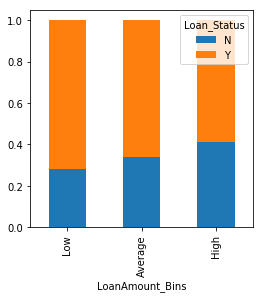

In [42]:
loanamount_bins.div(loanamount_bins.sum(1).astype(float), axis = 0).plot(kind = 'bar',stacked = True, figsize = (4,4) )

In [43]:
encoder = preprocessing.LabelEncoder()

In [44]:
train.Loan_Status = encoder.fit_transform(train['Loan_Status'])

In [94]:
train['Dependents'].replace('3+', 3, inplace = True)
test['Dependents'].replace('3+',3,inplace = True)

In [46]:
train['Dependents'].unique()

array(['0', '1', '2', 3, nan], dtype=object)

In [47]:
matrix = train.corr()

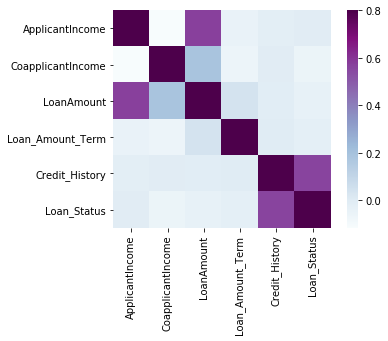

In [48]:
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [49]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Income_bin            0
LoanAmount_Bins      23
dtype: int64

In [50]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [51]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [52]:
train.drop(columns = 'LoanAmount_Bins', inplace = True)

In [53]:
train.drop(columns = 'Income_bin', inplace = True)

In [54]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [55]:
#Handling missing in Test
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [56]:
#Categorizing Values
train['Gender'] = encoder.fit_transform(train['Gender'])
train['Married'] = encoder.fit_transform(train['Married'])
train['Education'] = encoder.fit_transform(train['Education'])
train['Self_Employed'] = encoder.fit_transform(train['Self_Employed'])
train['Property_Area'] = encoder.fit_transform(train['Property_Area'])
train['Credit_History'] = encoder.fit_transform(train['Credit_History'])

In [57]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [58]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [59]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1


In [61]:
#Categorizing Values
test['Gender'] = encoder.fit_transform(test['Gender'])
test['Married'] = encoder.fit_transform(test['Married'])
test['Education'] = encoder.fit_transform(test['Education'])
test['Self_Employed'] = encoder.fit_transform(test['Self_Employed'])
test['Property_Area'] = encoder.fit_transform(test['Property_Area'])
test['Credit_History'] = encoder.fit_transform(test['Credit_History'])

In [62]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1,2


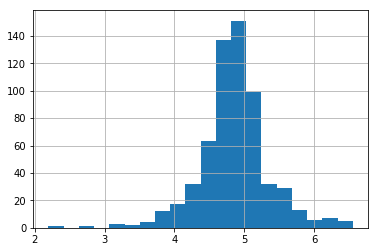

In [63]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [67]:
train = train.drop('Loan_ID', axis =1)


ValueError: labels ['Loan_ID'] not contained in axis

In [69]:
test = test.drop('Loan_ID', axis =1)

In [70]:
test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'LoanAmount_log'],
      dtype='object')

In [72]:
x = train.drop('Loan_Status', axis =1)

In [75]:
y = train.Loan_Status

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train,x_val,y_train,y_val = train_test_split(x,y, test_size=.3)

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
model = LogisticRegression()

In [88]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
pred_val = model.predict(x_val)

In [91]:
accuracy_score(y_val,pred_val)

0.8108108108108109

In [95]:
pred_test = model.predict(test)

In [98]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

NameError: name 'confusion_matrix' is not defined

In [101]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [102]:
print(confusion_matrix(y_val,pred_val))

[[ 23  33]
 [  2 127]]
